In [1]:
import os
import sys
import pprint

base_dir = 'C:\Documents\Thesis_ssd\MasterThesis'
os.chdir(base_dir)

from Classes.DataProcessing.LoadData import LoadData
from Classes.DataProcessing.BaselineHelperFunctions import BaselineHelperFunctions
from Classes.DataProcessing.DataHandler import DataHandler
from Classes.DataProcessing.DataGenerator import DataGenerator
from Classes.Modeling.Models import Models
from Classes.Modeling.RandomGridSearch import RandomGridSearch
from Classes.Modeling.CustomCallback import CustomCallback
from Classes.Modeling.ResultFitter import ResultFitter
from Classes.Scaling.ScalerFitter import ScalerFitter
from Classes.Scaling.MinMaxScalerFitter import MinMaxScalerFitter
from Classes.Scaling.StandardScalerFitter import StandardScalerFitter
import json

helper = BaselineHelperFunctions()
%load_ext tensorboard

In [2]:
num_classes = 2
loadData = LoadData(num_classes, isBalanced = True)
shuffle = True
full_ds, train_ds, val_ds, test_ds = loadData.getDatasets(shuffle = shuffle)
handler = DataHandler()
pp = pprint.PrettyPrinter(indent=4)
helper = BaselineHelperFunctions()

In [3]:
hyper_grid = {
        "batch_size" : [16, 32, 64, 128, 256, 512, 1024],
        "epochs" : [25, 30, 35],
        "learning_rate" : [0.1, 0.01, 0.001, 0.0001, 0.00001],
        "optimizer" : ["adam", "rmsprop", "sgd"]
    }
model_grid = {
    "start_neurons" : [16, 32, 64, 128, 256, 512, 1024],
    "dropout_rate" : [0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0.001, 0],
    "filters" : [11, 13, 15, 17, 19, 21, 23, 25, 27],
    "kernel_size" : [3, 5, 7, 9, 11, 13, 15],
    "padding" : ["same"],
    "l2_r" : [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
    "l1_r" : [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
    "activation" : ["relu", "sigmoid", "softmax", "tanh"],
    "output_layer_activation" : ["softmax", "sigmoid"]
}


model_nr = 6

test_mode = False
use_scaler = True
use_noise_augmentor = True
detrend = False
use_minmax = False
use_highpass = False
highpass_freq = 0.1

n_picks = 30

use_tensorboard = False
use_liveplots = True
use_custom_callback = False
use_early_stopping = True
start_from_scratch = False

randomGridSearch = RandomGridSearch(train_ds, val_ds, test_ds, model_nr, test_mode, detrend,
                                    use_scaler, use_noise_augmentor, use_minmax, use_highpass, n_picks, 
                                    hyper_grid = hyper_grid, model_grid = model_grid, 
                                    num_classes = num_classes, use_tensorboard = use_tensorboard,
                                    use_liveplots = use_liveplots, use_custom_callback = use_custom_callback,
                                    use_early_stopping = use_early_stopping, highpass_freq = highpass_freq,
                                    start_from_scratch = start_from_scratch)

In [4]:
def clear_tensorboard_dir():
    import os
    import shutil
    path = f"{base_dir}/Tensorboard_dir/fit"
    files = os.listdir(path)
    print(files)
    for f in files:
        shutil.rmtree(os.path.join(path,f))
if use_tensorboard:
    clear_tensorboard_dir()
    %tensorboard --logdir tensorboard_dir/fit

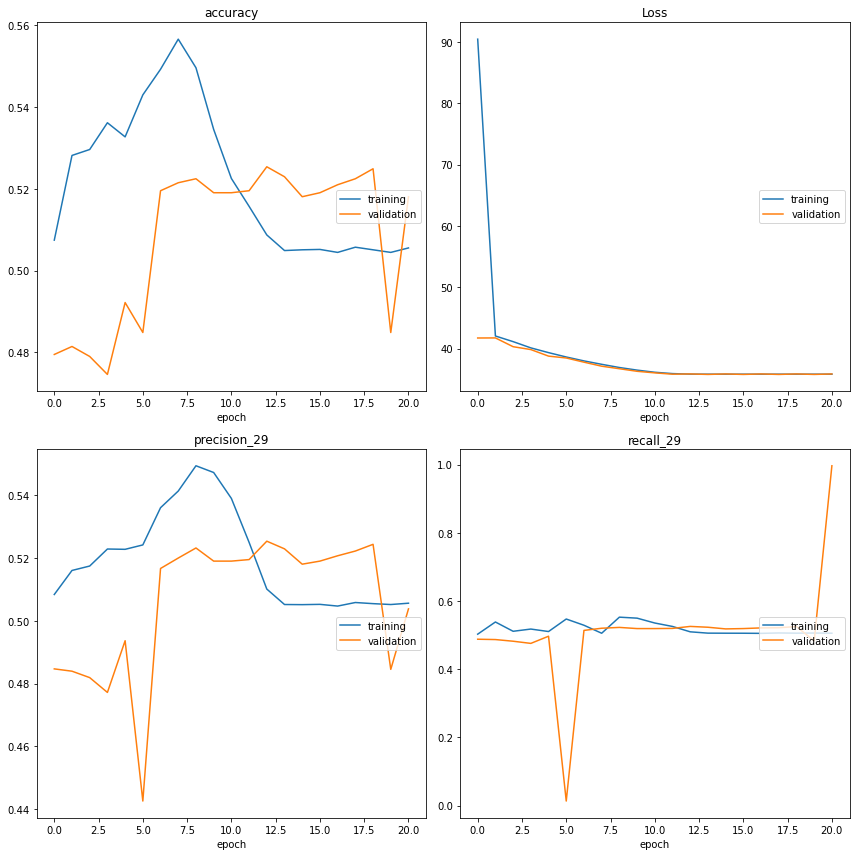

accuracy
	training         	 (min:    0.504, max:    0.557, cur:    0.506)
	validation       	 (min:    0.475, max:    0.525, cur:    0.518)
Loss
	training         	 (min:   35.811, max:   90.451, cur:   35.811)
	validation       	 (min:   35.771, max:   41.726, cur:   35.850)
precision_29
	training         	 (min:    0.505, max:    0.549, cur:    0.506)
	validation       	 (min:    0.443, max:    0.525, cur:    0.504)
recall_29
	training         	 (min:    0.503, max:    0.553, cur:    0.505)
	validation       	 (min:    0.013, max:    0.997, cur:    0.997)
Restoring model weights from the end of the best epoch.
43/42 [==============================] - 28s 653ms/step - loss: 35.8106 - accuracy: 0.5055 - precision_29: 0.5056 - recall_29: 0.5055 - val_loss: 35.8502 - val_accuracy: 0.5181 - val_precision_29: 0.5038 - val_recall_29: 0.9966
Epoch 00021: early stopping
{'train_loss': 35.77143096923828, 'train_accuracy': 0.509765625, 'train_precision': 0.5088062882423401, 'train_recall': 0.5

In [5]:
results_df, min_loss, max_accuracy, max_precision, max_recall= randomGridSearch.fit()

In [11]:
max_accuracy_i = max_accuracy['val_index']
max_accuracy_i_train = max_accuracy['train_index']
max_precision_i = max_precision['val_index']
max_recall_i = max_recall['val_index']

21

In [14]:
results_df[results_df.columns[0:13]]

batch_size epochs learning_rate optimizer start_neurons dropout_rate  \
0         512     25           0.1   rmsprop          relu            0   
1         256     35         1e-05       sgd       sigmoid          0.2   
2          16     30           0.1      adam       softmax          0.4   
3          16     30         0.001   rmsprop       softmax            0   
4         256     25         1e-05      adam       softmax          0.4   
5          64     35         0.001       sgd       sigmoid          0.5   
6          16     25          0.01       sgd       softmax          0.1   
7         128     35         0.001      adam          relu        0.001   
8          16     30        0.0001   rmsprop       softmax          0.2   
9          16     25         1e-05   rmsprop          relu            0   
10        128     25         0.001       sgd       sigmoid            0   
11        128     30         1e-05   rmsprop          tanh          0.2   
12        512     35         1e-05       sgd          relu          0.3   
13        256     35           0.1      adam          relu            0   
14        256     25         0.001       sgd          relu          0.5   
15        512     25        0.0001   rmsprop       softmax          0.2   
16         64     30           0.1       sgd          relu          0.1   
17         64     35        0.0001       sgd          relu            0   
18        512     25         0.001   rmsprop          relu          0.4   
19        128     30          0.01   rmsprop          relu          0.1   
20         16     35          0.01   rmsprop          relu          0.4   
21         16     35        0.0001       sgd          relu        0.001   
22         32     35         0.001      adam       softmax          0.1   
23       1024     30         1e-05      adam       sigmoid          0.1   
24       1024     35           0.1      adam       softmax        0.001   
25         64     35         0.001      adam       sigmoid            0   
26        512     30           0.1   rmsprop          relu         0.01   
27        512     25         1e-05   rmsprop       sigmoid          0.1   
28         16     25         0.001   rmsprop       sigmoid            0   
29        256     35         0.001   rmsprop          tanh          0.5   

   filters kernel_size padding    l2_r     l1_r activation  \
0       13           7     0.3  0.0001  softmax       same   
1       23          11    0.01     0.2  softmax       same   
2       25          13  0.0001  0.0001  softmax       same   
3       11          13    0.01     0.2  sigmoid       same   
4       21          13     0.1     0.2  sigmoid       same   
5       15           9   0.001     0.2  sigmoid       same   
6       19          11     0.3     0.2  softmax       same   
7       17           5     0.2    0.01  sigmoid       same   
8       25          11   0.001     0.3  softmax       same   
9       17           9     0.2     0.2  softmax       same   
10      11           3     0.2   0.001  sigmoid       same   
11      23           9     0.1     0.3  sigmoid       same   
12      21          11     0.3     0.2  sigmoid       same   
13      23           7     0.1     0.3  sigmoid       same   
14      27           7    0.01    0.01  softmax       same   
15      25          15   0.001  0.0001  sigmoid       same   
16      13          11     0.3    0.01  sigmoid       same   
17      27          15  0.0001     0.2  softmax       same   
18      13           5     0.2    0.01  softmax       same   
19      17           5     0.3   0.001  softmax       same   
20      15          11    0.01     0.3  sigmoid       same   
21      21           5   0.001    0.01  sigmoid       same   
22      23           5    0.01  0.0001  softmax       same   
23      13           7    0.01     0.1  sigmoid       same   
24      11           5     0.1     0.2  sigmoid       same   
25      27           9  0.0001     0.2  sigmoid       same   
26 

**Max val accuracy**

In [13]:
model_accuracy = randomGridSearch.fit_from_index(results_df, max_accuracy_i)

ValueError: could not convert string to float: 'sigmoid'

**Max train accuracy**

In [ ]:
model_accuracy_train = randomGridSearch.fit_from_index(results_df, max_accuracy_train_i)

**Max val precision**

In [ ]:
model_accuracy_train = randomGridSearch.fit_from_index(results_df, max_precision_i)

**Highest recall**

In [ ]:
model_recall = randomGridSearch.fit_from_index(results_df, max_recall_i)